In [ ]:
# july-2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
dataFrame=pd.read_csv('911.csv')
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
# top 5 zipcode
dataFrame['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [10]:
# top 5 twp reaching 911
dataFrame['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [12]:
# unique reason to call 911
dataFrame['title'].nunique()

148

In [17]:
# top 5 specific reason to call 911
dataFrame['Reason']= dataFrame['title'].apply(lambda title: title.split(":")[0])
dataFrame['SpecificReason']= dataFrame['title'].apply(lambda title: title.split(":")[1])

# no need of for loop as pandas apply will take care of it by applying to entire column

In [18]:
#check wether it is created or not
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS


In [22]:
dataFrame['SpecificReason'].value_counts().head(10)

 VEHICLE ACCIDENT -       148372
 DISABLED VEHICLE -        47909
 FIRE ALARM                38452
 VEHICLE ACCIDENT          36377
 FALL VICTIM               34683
 RESPIRATORY EMERGENCY     34250
 CARDIAC EMERGENCY         32339
 ROAD OBSTRUCTION -        23235
 SUBJECT IN PAIN           19650
 HEAD INJURY               18304
Name: SpecificReason, dtype: int64

In [21]:
dataFrame['Reason'].value_counts().head()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

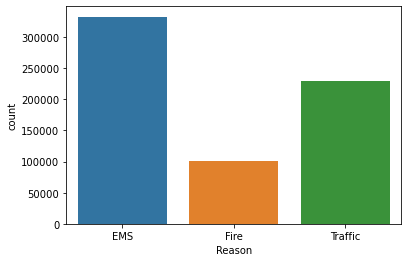

In [25]:
sns.countplot(x='Reason',data=dataFrame)

In [26]:
# changing time stamp datatype to datetime
dataFrame['timeStamp']=pd.to_datetime(dataFrame['timeStamp'])
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   lat             663522 non-null  float64       
 1   lng             663522 non-null  float64       
 2   desc            663522 non-null  object        
 3   zip             583323 non-null  float64       
 4   title           663522 non-null  object        
 5   timeStamp       663522 non-null  datetime64[ns]
 6   twp             663229 non-null  object        
 7   addr            663522 non-null  object        
 8   e               663522 non-null  int64         
 9   SpecificReason  663522 non-null  object        
 10  Reason          663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 55.7+ MB


In [27]:
dataFrame['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

In [28]:
# create 3 columns for Hour, Month and day of week
dataFrame['Hour']=dataFrame['timeStamp'].apply(lambda time:time.hour)
dataFrame['Month']=dataFrame['timeStamp'].apply(lambda time:time.month)
dataFrame['Day']=dataFrame['timeStamp'].apply(lambda time:time.dayofweek)
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   lat             663522 non-null  float64       
 1   lng             663522 non-null  float64       
 2   desc            663522 non-null  object        
 3   zip             583323 non-null  float64       
 4   title           663522 non-null  object        
 5   timeStamp       663522 non-null  datetime64[ns]
 6   twp             663229 non-null  object        
 7   addr            663522 non-null  object        
 8   e               663522 non-null  int64         
 9   SpecificReason  663522 non-null  object        
 10  Reason          663522 non-null  object        
 11  Hour            663522 non-null  int64         
 12  Month           663522 non-null  int64         
 13  Day             663522 non-null  int64         
dtypes: datetime64[ns](1), float64(3), in

In [31]:
dataFrame['Day'].nunique()

7

In [32]:
dataFrame['Month'].nunique()

12

In [33]:
dataFrame['Hour'].nunique()

24

<AxesSubplot:xlabel='Month', ylabel='count'>

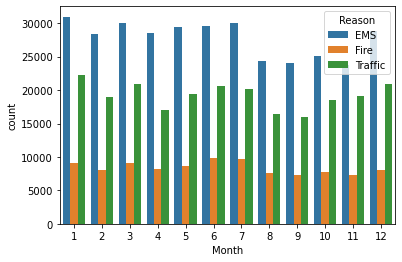

In [34]:
# plot a graph for Month
sns.countplot(x='Month',data=dataFrame,hue='Reason')

<AxesSubplot:xlabel='Hour', ylabel='count'>

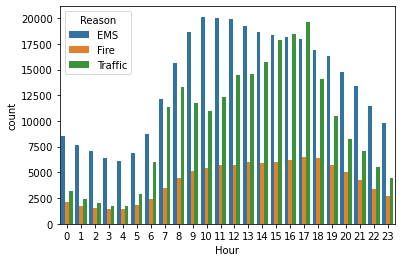

In [35]:
sns.countplot(x='Hour',data=dataFrame,hue='Reason')

In [36]:
# use groupby
byMonth=dataFrame.groupby('Month').count()

In [37]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,Reason,Hour,Day
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509


<AxesSubplot:xlabel='Month'>

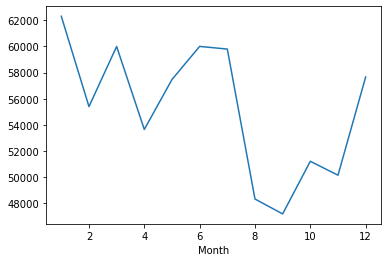

In [38]:
byMonth['twp'].plot()

<AxesSubplot:xlabel='Day'>

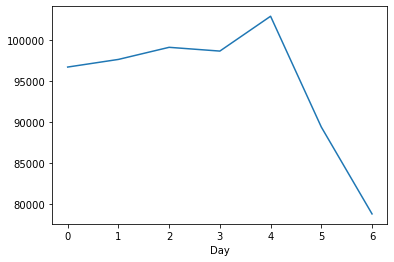

In [39]:
byDay=dataFrame.groupby('Day').count()
byDay['twp'].plot()